# M2 CV - TP3 : Un arc-en-ciel de couleurs :D

Aujourd'hui, on oublie les images en niveaux de gris, et on passe aux images couleurs. Pourquoi passer à la couleur ? Pourquoi abandonner les images en niveaux de gris ? Que nous cache Lena en couleur ? Vous le saurez aujourd'hui dans ce TP....

In [6]:
# Chargement des librairies
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io

In [12]:
path_base = 'C:\\Users\\surfaC\\Desktop\\Master SID\\Computer Vision\\images-20220324\\'

## Ex. 0 : Comment ça ? Il y a d'autres espaces de couleurs autres que RGB ?

Et oui ! On connaît le fameux espace de couleur RGB, mais il en existe plein d'autres. Pour ce TP, on va en découvrir quelques uns. Mais d'abord, choississons une image couleur à étudier (crayons.jpg aujourd'hui). Chargez là, et affichez la (attention, je veux obligatoirement du RGB !!)

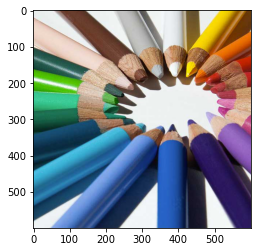

In [13]:
# Chargement et affichage de crayons.jpg EN COULEUR !
crayon=io.imread(path_base+'crayons.jpg')
plt.imshow(crayon)

In [25]:
crayon.shape

(600, 600, 3)

Durant ce TP, nous allons découvrir plusieurs espaces de couleurs, leur utilité et leurs particularités. Vous vous en doutez, OpenCV fait tout, et notamment les conversions dans différents espaces de couleur. Maintenant, comme c'est un TP, je vais vous demander donc de développer les conversions vous-même, mais on fera une comparaison avec les conversions via OpenCV.

## Ex. 1 : CMYK, on commence tranquille

Commençons avec l'espace de couleur CMYK (pour Cyan, Magenta, Yellow et blacK). Celui-ci, vous le connaissez, c'est utilisé pour les impressions. Le principe, c'est que contrairement, ou la synthèse est additive (toutes les composantes R, G et B en quantité maximale donne la couleur blanche); ici, la synthèse est soustractive (toutes les composantes C, M et Y en quantité maximale donne la couleur noire). La dernière composante, noire, permet tout simplement de minimiser les composantes couleurs, plus chères que la composante noire lors de l'impression.

La conversion n'est pas disponible via OpenCV, mais elle reste assez simple pour autant, avec r, g et b les composantes Red, Green et Blue normalisées (float entre 0 et 1) :

\begin{equation*}
k = 1-max(r,g,b) \\
c = 1-r-k \\
m = 1-g-k \\
y = 1-b-k \\
\end{equation*}


In [18]:
# Le type de données de l'image est unit8

In [26]:
crayon[:,:,0]

array([[233, 233, 233, ..., 102, 102, 102],
       [233, 233, 233, ..., 102, 102, 102],
       [233, 233, 233, ..., 102, 102, 102],
       ...,
       [239, 239, 239, ...,  41,  41,  41],
       [239, 239, 239, ...,  41,  41,  41],
       [239, 239, 239, ...,  41,  41,  41]], dtype=uint8)

In [27]:
# Fonction qui génére la feuille blanche
def feuilleblanche(img):
    idx=img.shape[0]
    idy=img.shape[1]
    
    r=np.zeros((idx,idy))
    g=np.zeros((idx,idy))
    b=np.zeros((idx,idy))
    r[:,:]=255
    g[:,:]=255
    b[:,:]=255
    fb=np.stack([r,g,b],axis=-1)
    print(fb.shape)

    return fb

In [28]:
feuilleblanche(crayon)

(600, 600, 3)


array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [29]:
# Fonction de conversion de l'image RGB en CMYK
def conversion_RGB_CMYK(img):
    idx=img.shape[0]
    idy=img.shape[1]
    
    img=img/255
    
    k=np.zeros((idx,idy))
    c=np.zeros((idx,idy))
    y=np.zeros((idx,idy))
    m=np.zeros((idx,idy))
    r=img[:,:,0]
    g=img[:,:,1]
    b=img[:,:,2]
    
    for i in range(idx):
        for j in range(idy):
            𝑘[i,j]=1-max((𝑟[i,j]),(𝑔[i,j]),(𝑏[i,j]))
            𝑐[i,j]=1-(𝑟[i,j])-𝑘[i,j]
            𝑚[i,j]=1-(𝑔[i,j])-𝑘[i,j]
            𝑦[i,j]=1-(𝑏[i,j])-𝑘[i,j]
    c=(c*255).astype(np.uint8)
    k=(k*255).astype(np.uint8)
    m=(m*255).astype(np.uint8)
    y=(y*255).astype(np.uint8)
    Newimg=np.stack([c,m,y,k],axis=-1)
    print(Newimg.shape)
    plt.figure(5)
    plt.imshow(Newimg)
    return Newimg,c,m,y,k


(600, 600, 4)


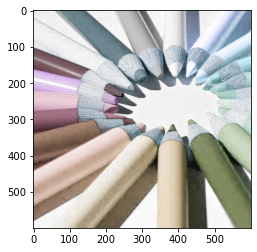

In [30]:
Newimg,c,m,y,k=conversion_RGB_CMYK(crayon)

Affichez le résultat channel par channel. Attention, ici, on va affichez le résultat comme dans le cadre d'une impression : notre image est donc à la base blanche, et on affichera chaque channel en soustrayant celui-ci à la "feuille blanche".

(600, 600, 3)
(600, 600, 3)
(600, 600, 3)
(600, 600, 3)


Text(0.5, 1.0, 'Y')

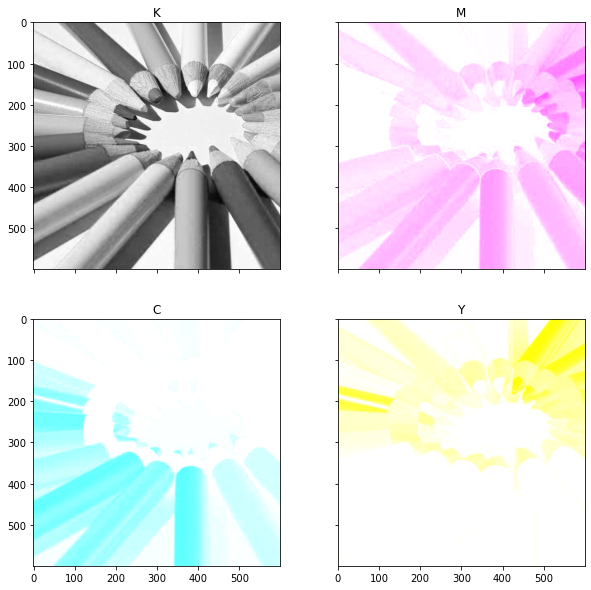

In [34]:
# Affichage du résultat channel par channel sur une "feuille blanche"

#Channel K
fbk=feuilleblanche(crayon).copy()
#print(fb[:,:,0])
fbk[:,:,0]=fbk[:,:,0]-k
fbk[:,:,1]=fbk[:,:,1]-k
fbk[:,:,2]=fbk[:,:,2]-k
#print(fb)

#Channel C
fbc=feuilleblanche(crayon).copy()
#print(fb[:,:,0])
fbc[:,:,0]=fbc[:,:,0]-c
#print(fb)

#Channel M
fbm=feuilleblanche(crayon).copy()
#print(fb[:,:,0])
fbm[:,:,1]=fbm[:,:,1]-m
#print(fb)

#Channel Y
fby=feuilleblanche(crayon).copy()
#print(fb[:,:,0])
fby[:,:,2]=fby[:,:,2]-y
#print(fb)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2, figsize=(10, 10), sharex=True,
                                   sharey=True)

ax1.imshow(fbk.astype(np.uint8))
ax1.set_title('K')
ax2.imshow(fbm.astype(np.uint8))
ax2.set_title('M')
ax3.imshow(fbc.astype(np.uint8))
ax3.set_title('C')
ax4.imshow(fby.astype(np.uint8))
ax4.set_title('Y')

In [35]:
# Et pour finir tranquillement cet exercice, recréez l'image RGB de base à partir de la "feuille blanche" et des composantes C, M, Y et K à soustraire.
fb=feuilleblanche(crayon).copy()
#print(fb[:,:,0])
fb[:,:,0]=fb[:,:,0]-k-c
fb[:,:,1]=fb[:,:,1]-k-m
fb[:,:,2]=fb[:,:,2]-k-y

(600, 600, 3)


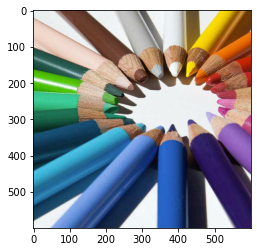

In [36]:
# Affichage de la feuille imprimée (feuille blanche où on retire les composantes C,M,Y et K)
plt.imshow(fb.astype(np.uint8))

## Ex. 2 : YUV

Continuons ce TP avec l'espace de couleur YUV. Cet espace de couleurs a été conçu en 1960 pour une raison très précise. A cette époque, les premières télévisions couleurs apparaissent, et les chaînes de télévision doivent donc envoyer un signal pour 2 types de télévisions différentes : les télévisions couleurs et les télévisions Noir et Blanc. Cependant, les plus anciennes télévisions ne sont pas adaptées pour traiter un signal différent que ceux qu'elles recevaient avant : on ne peut donc envoyer un signal style RGB et faire la conversion en N&B à la réception. Pour cela, il fallait envoyer un signal comprenant l'info en niveau de gris, comme auparavant, mais avec des autres composantes pour afficher la couleur pour les télévisions qui le peuvent. 

Pour cela, l'espace de couleur YUV a été créé. Il est composé d'une composante luminance (Y) contenant l'information en N&B, et 2 composantes chrominances (U et V) contenant l'information couleur. Par exemple, dans la plage suivante, les composantes U et V permettent de caractériser ces couleurs, pour Y = 0.5. Ce que cela veut dire, c'est que toutes ces couleurs converties en N&B donneront uniquement 0.5, soit Y.

![YUV.png](YUV.png)

Pour ce faire, on va utiliser les formules suivantes, avec r, g et b les composantes Red, Green et Blue normalisées (float entre 0 et 1) :
\begin{equation*}
y = r + g + b \\
u = b - y \\
v = r - y
\end{equation*}

*_Note :_* si vous n'avez pas le même résultat qu'OpenCV, c'est normal : on utilise une version très simplifiée, sans applicateurs correctifs. La version d'OpenCV, nettement améliorée, permet d'obtenir un channel Y (niveaux de gris) beaucoup plus fidèle que pour notre version.

In [37]:
# Fonction de conversion manuelle de l'image RGB en YUV
def conversion_RGB_YUV(img):
    idx=img.shape[0]
    idy=img.shape[1]
    y=np.zeros((idx,idy))
    u=np.zeros((idx,idy))
    v=np.zeros((idx,idy))
    r=img[:,:,0]
    g=img[:,:,1]
    b=img[:,:,2]
    y=r+g+b
    u=b-y
    v=r-y
    img_yuv=np.stack([y,u,v],axis=-1)
    return y.astype(np.uint8),u.astype(np.uint8),v.astype(np.uint8),img_yuv.astype(np.uint8)

In [49]:
y,u,v,img_yuv=conversion_RGB_YUV(crayon)

Affichez le résultat channel par channel des résultats obtenus.

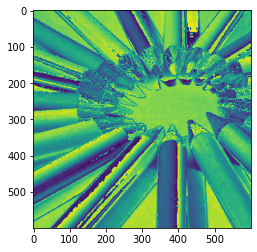

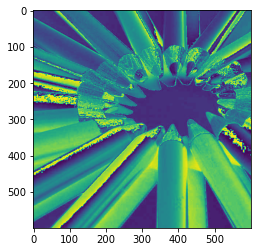

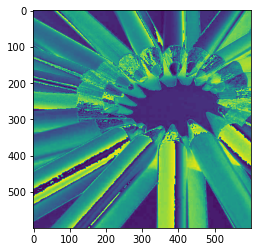

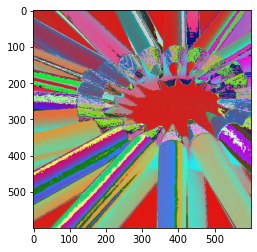

In [39]:
# Affichage des résultats channel par channel
plt.figure(1)
plt.imshow(y.astype(np.uint8))
plt.figure(2)
plt.imshow(u.astype(np.uint8))
plt.figure(3)
plt.imshow(v.astype(np.uint8))
plt.figure(4)
plt.imshow(img_yuv.astype(np.uint8))

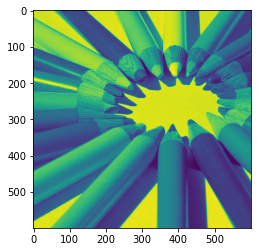

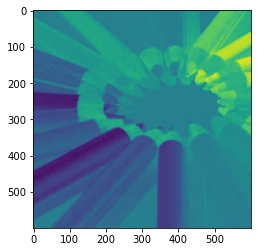

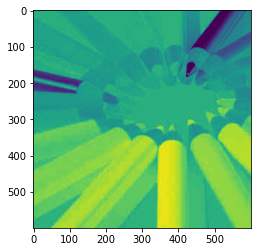

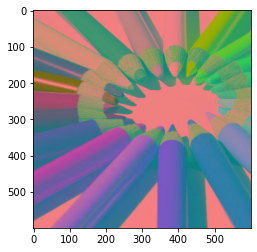

In [52]:
# Conversion de l'image RGB en YUV via OpenCV
img_yuv = cv2.cvtColor(crayon, cv2.COLOR_BGR2YUV)
y, u, v = cv2.split(img_yuv)
plt.figure(1)
plt.imshow(y)
plt.figure(2)
plt.imshow(u)
plt.figure(3)
plt.imshow(v)
plt.figure(4)
plt.imshow(img_yuv)


Si tout va bien, on peut voir que visuellement, les channels Y de nos 2 résultats se ressemblent pas mal, ce qui nous conviendra. Maintenant, l'objectif va être de recréer l'image RGB à partir de l'image YUV que nous avons calculé auparavant, comme le faisaient les télévisions couleurs à l'ancienne époque.

In [45]:
# Conversion manuelle de l'image YUV en RGB et affichage du résultat
def conversion_YUV_RGB(img):
    idx=img.shape[0]
    idy=img.shape[1]
    r=np.zeros((idx,idy))
    g=np.zeros((idx,idy))
    b=np.zeros((idx,idy))
    y=img[:,:,0]
    u=img[:,:,1]
    v=img[:,:,2]
    g=(y-r-b).astype(np.uint8)
    b=(u+y).astype(np.uint8)
    r=(v+y).astype(np.uint8)
    
    img_rgb=np.stack([r,g,b],axis=-1)
   
    return r,g,b,img_rgb

In [50]:
r,g,b,img_rgb=conversion_YUV_RGB(img_yuv)

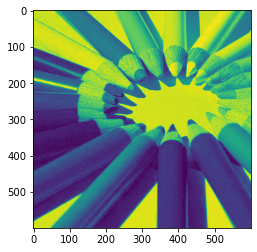

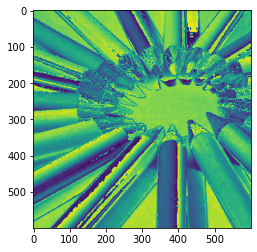

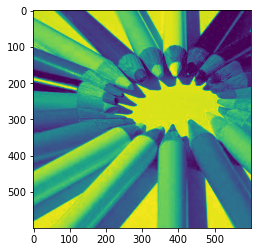

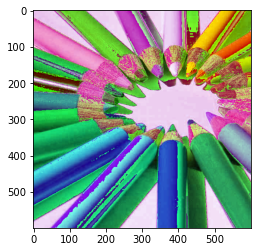

In [51]:
# affichage du résultat de la conversion manuelle de l'image YUV en RGB
plt.figure(1)
plt.imshow(r)
plt.figure(2)
plt.imshow(g)
plt.figure(3)
plt.imshow(b)
plt.figure(4)
plt.imshow(img_rgb)

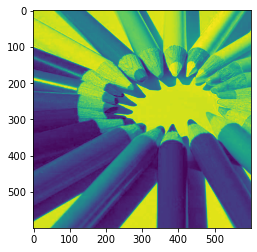

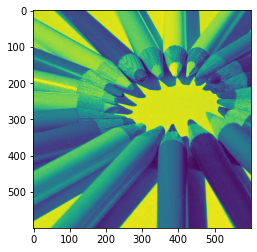

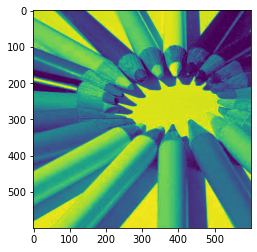

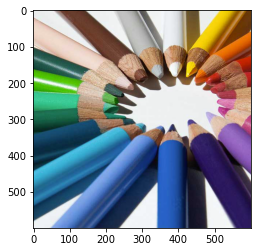

In [53]:
# Conversion de l'image YUV  en RGB via OpenCV
img_rgbo = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
ro, go, bo = cv2.split(img_rgbo)
plt.figure(1)
plt.imshow(ro)
plt.figure(2)
plt.imshow(go)
plt.figure(3)
plt.imshow(bo)
plt.figure(4)
plt.imshow(img_rgbo)

## Ex. 3 : HSV

Poursuivons avec l'espace de couleur HSV (pour Hue, Saturation et Value) ou TSI en français (Teinte, Saturation, Intensité). Comme RGB, on a également 3 channels définis de la manière suivante :
- La teinte (Hue) est codée suivant l'angle qui lui correspond sur le cercle des couleurs (de 0 à 360°).
- La saturation (Saturation) est l'intensité de la couleur (de 0 à 100%).
- La valeur (Value) est la brillance de la couleur (de 0 à 100%).

![HSVCone.png](HSVCone.png)

On peut convertir une image RGB en image HSV grâce aux formules suivantes (r,g,b sont respectivement les channels Red, Green et Blue normalisés de notre image RGB ; h,s,v sont les channels Hue, Saturation et Value normalisés de notre image HSV) :

\begin{equation*}
max\_rgb = max(r,g,b) \\
min\_rgb = min(r,g,b) \\
h=\begin{cases}
0, & \mbox{si } \max = \min \\
(60^\circ \times \frac{g - b}{\max - \min} + 360^\circ)\;\bmod\;360^\circ,   & \mbox{si } \max = r \\
60^\circ \times \frac{b - r}{\max - \min} + 120^\circ, & \mbox{si } \max = g \\
60^\circ \times \frac{r - g}{\max - \min} + 240^\circ, & \mbox{si } \max = b
\end{cases} \\
s = 
\begin{cases}
0, & \mbox{si } \max = 0 \\
1 - \frac {\min} {\max}, & \mbox{sinon}
\end{cases} \\
v = max\_rgb
\end{equation*}
Notez juste que dans le cadre de notre implémentation, il faudra également qu'on divise notre channel h par 2 pour avoir une valeur entre 0 et 180° (histoire d'avoir nos images codées en uint8).

Réalisez la conversion manuellement, puis avec OpenCV (cvtColor, toi-même tu sais).

In [21]:
# Transformation de l'image RGB en HSV (manuelle)
def conversion_RGB_HSV(img):
    idx=img.shape[0]
    idy=img.shape[1]
    h=np.zeros((idx,idy))
    s=np.zeros((idx,idy))
    v=np.zeros((idx,idy))
    r=img[:,:,0]
    g=img[:,:,1]
    b=img[:,:,2]
    Max=np.maximum(np.maximum(r,g),b)
    Min=np.minimum(np.minimum(r,g),b)
    v=Max
    print(Max)
    MaxO=Max==np.zeros((idx,idy))
    print(MaxO)
    print(np.unique(MaxO))
    MinMax=1-(Min/Max)
    Max_Min=Max-Min
    MaxEqMin=Max==Min
    MaxEqr=Max==r
    MaxEqg=Max==g
    MaxEqb=Max==b
    for i in range(idx):
        for j in range(idy):
            if MaxO[i,j]==True:
                s[i,j]=0
            else:
                s[i,j]=MinMax[i,j]
            
   
            if MaxEqMin[i,j]==True:
                h[i,j]=0

            elif MaxEqr[i,j]==True:
                h[i,j]=(60*((g-b)[i,j]/(Max_Min)[i,j])+360) % 360

            elif MaxEqg[i,j]==True:
                h[i,j]=(60*((b-r)[i,j]/(Max_Min)[i,j])+120)

            elif MaxEqb[i,j]==True:
                h[i,j]=(60*((r-g)[i,j]/(Max_Min)[i,j])+240)

    print(s)    
    print(v.shape)
    print(s.shape)
    print(h.shape)
    
    
    img_hsv=np.stack([h,s,v],axis=-1)
    return h.astype(np.uint8),(s*255).astype(np.uint8),v.astype(np.uint8),img_hsv.astype(np.uint8)

In [22]:
h,s,v,img_hsv=conversion_RGB_HSV(crayon)

[[237 237 237 ... 102 102 102]
 [237 237 237 ... 102 102 102]
 [237 237 237 ... 102 102 102]
 ...
 [246 246 246 ...  95  95  95]
 [246 246 246 ...  95  95  95]
 [246 246 246 ...  95  95  95]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[False]
[[0.01687764 0.01687764 0.01687764 ... 0.91176471 0.91176471 0.91176471]
 [0.01687764 0.01687764 0.01687764 ... 0.91176471 0.91176471 0.91176471]
 [0.01687764 0.01687764 0.01687764 ... 0.91176471 0.91176471 0.91176471]
 ...
 [0.02845528 0.02845528 0.02845528 ... 0.72631579 0.72631579 0.72631579]
 [0.02845528 0.02845528 0.02845528 ... 0.72631579 0.72631579 0.72631579]
 [0.02845528 0.02845528 0.02845528 ... 0.72631579 0.72631579 0.72631579]]
(600, 600)
(600, 600)
(600, 600)


In [ ]:
# Affichage des résultats obtenus channel par channel et en couleur (manuelle et OpenCV)

Affichage des résultats obtenus channel par channel et en couleur cas manuel


Text(0.5, 1.0, 'Image HSV')

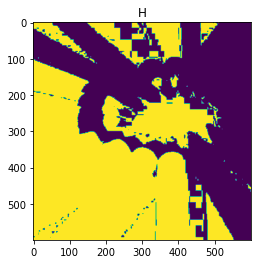

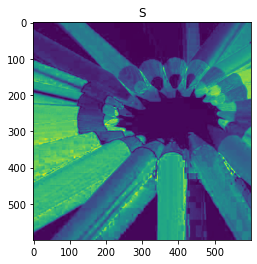

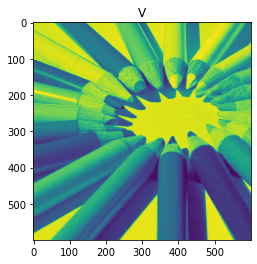

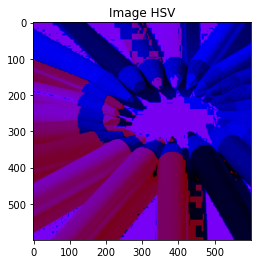

In [83]:
print("Affichage des résultats obtenus channel par channel et en couleur cas manuel")
plt.figure(1)
plt.imshow(h)
plt.title('H')
plt.figure(2)
plt.imshow(s)
plt.title('S')
plt.figure(3)
plt.imshow(v)
plt.title('V')
plt.figure(4)
plt.imshow(img_hsv)
plt.title('Image HSV')

Affichage des résultats obtenus channel par channel et en couleur cas Open CV


Text(0.5, 1.0, 'Image HSV')

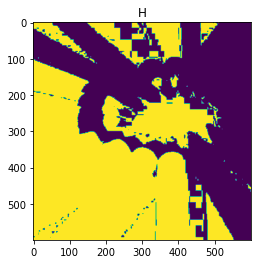

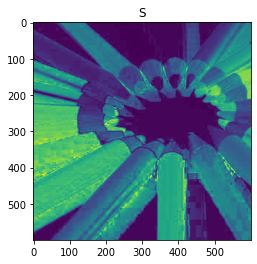

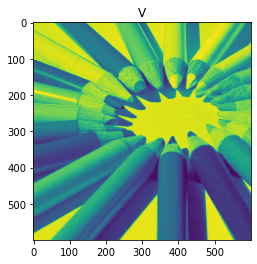

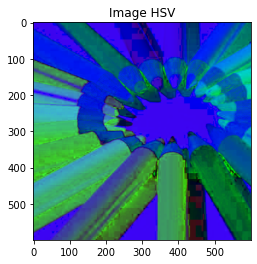

In [84]:
# Transformation de l'image RGB en HSV avec OpenCV
img_hsv = cv2.cvtColor(crayon, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)
print("Affichage des résultats obtenus channel par channel et en couleur cas Open CV")
plt.figure(1)
plt.imshow(h)
plt.title('H')
plt.figure(2)
plt.imshow(s)
plt.title('S')
plt.figure(3)
plt.imshow(v)
plt.title('V')
plt.figure(4)
plt.imshow(img_hsv)
plt.title('Image HSV')

"Alors, cool, un nouvel espace de couleur. Mais qu'est-ce que ça peut nous fou*** ?!"

Tout d'abord, tu vas te calmer, je ne t'ai rien fait. Ensuite, c'est très utile si vous avez déjà utilisé Photoshop par exemple... On va voir ça avec l'exercice suivant.

Mais d'abord, attardons-nous sur le channel H (Hue, ou Teinte). Dans cet espace de couleur, c'est sur ce channel qu'on a les informations de chrominance (la couleur). Pour que vous ayez une meilleure représentation de tout cela, on va tracer des nuages de points dans les deux espaces de couleurs. Commençons d'abord avec les points de l'image rgb_image dans l'espace de couleurs RGB.

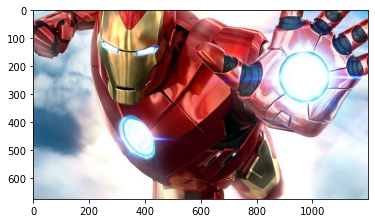

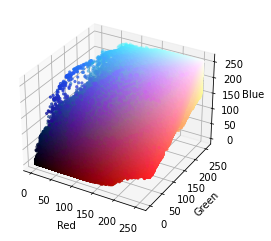

In [88]:
# Définissez votre image RGB
ironman=io.imread(path_base+'iron_man.jpg')
plt.imshow(ironman)
rgb_image = ironman

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib import collections  as mc

r, g, b = cv2.split(rgb_image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = rgb_image.reshape((np.shape(rgb_image)[0]*np.shape(rgb_image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Ici, les pixels de même teinte (les pixels bleus foncés par exemple) occupent une plage très étendue. Les trois channels (R, G et B) contiennent des informations chrominance et luminosité. Cela veut dire qu'on aura énormement de mal à sélectionner les pixels d'une même teinte en analysant les valeurs d'un seul channel (il ne suffit pas de prendre les points avec des valeurs élevées sur le channel Red pour récupérer uniquement les pixels de teinte rouge par exemple).

Si maintenant, on représente les points de hsv_image dans l'espace HSV (attention, on trâce ici les pixels dans une représentation en cône pour une meilleure visualisation des pixels dans cet espace de couleur).

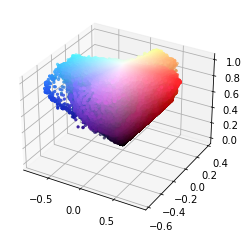

In [113]:

# Définissez votre image hsv calculée (manuellement ou par OpenCV)
img_hsv = cv2.cvtColor(ironman, cv2.COLOR_RGB2HSV)
hsv_image = img_hsv

h, s, v = cv2.split(hsv_image)
s=s/255.
v=v/255.
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

x = v*s*np.cos(np.deg2rad(h.astype(np.uint16)*2))
y = v*s*np.sin(np.deg2rad(h.astype(np.uint16)*2))
axis.scatter(x.flatten(), y.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")

plt.show()

C'est pas super visible en 3D, mais on peut déjà voir que les pixels de teinte proche sont assez bien regroupés entre eux. Avec ce nouveau nuage de points en 2D (vue du dessus), on verra déjà mieux :

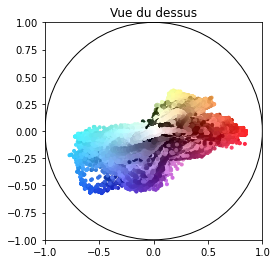

In [94]:
hsv_image_2 = hsv_image.copy()
hsv_image_2[hsv_image[:,:,2]<200]=0
h, s, v = cv2.split(hsv_image)
s=s/255.
v=v/255.
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1)
axis.set_aspect(1)
axis.set_xlim(-1,1)
axis.set_ylim(-1,1)
x = v*s*np.cos(np.deg2rad(h.astype(np.uint16)*2))
y = v*s*np.sin(np.deg2rad(h.astype(np.uint16)*2))
axis.scatter(x.flatten(), y.flatten(), facecolors=pixel_colors, marker=".")
draw_circle = plt.Circle((0,0), 1,fill=False)

plt.gcf().gca().add_artist(draw_circle)
plt.title("Vue du dessus")
plt.show()

Dans cette représentation, pour chaque pixel, ses coordonnées répondent aux formules suivantes : 
\begin{equation*}
x = cos(H) \times S \times V \\
y = sin(H) \times S \times V
\end{equation*}

Pour pouvoir comparer, voici ce que donne le dessus de la représentation cône HSV en général, avec les différentes valeurs en degré de H :
![HSVWheel.png](HSVWheel.png)

Dans une représentation en coordonnées polaires, le rayon signifie donc S x V et l'angle théta signifie le channel H. On peut voir donc que des pixels d'une même teinte de couleur (jaune par exemple) auront des valeurs S et V très diverses, mais seront regroupés dans un intervalle assez restreint sur H (entre 35° et 65°).

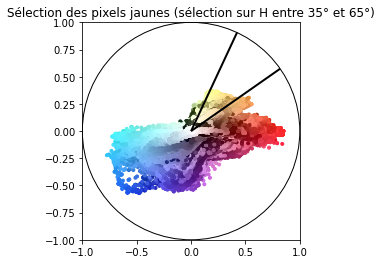

In [91]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1)
axis.set_aspect(1)
axis.set_xlim(-1,1)
axis.set_ylim(-1,1)
axis.scatter(x.flatten(), y.flatten(), facecolors=pixel_colors, marker=".")
draw_circle = plt.Circle((0,0), 1,fill=False)

lines = [[(0, 0), (np.cos(np.deg2rad(35)), np.sin(np.deg2rad(35)))], [(0, 0), (np.cos(np.deg2rad(65)), np.sin(np.deg2rad(65)))]]
c = np.array([(0, 0, 0, 1), (0, 0, 0, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
axis.add_collection(lc)

plt.gcf().gca().add_artist(draw_circle)
plt.title("Sélection des pixels jaunes (sélection sur H entre 35° et 65°)")
plt.show()

Attention, je le répète encore une fois : le channel H ne contient pas les mêmes valeurs que celles qu'ont peut voir sur les graphes. Pour pouvoir obtenir des valeurs codées en uint8, celles-ci ont été divisées par 2 pour passer de l'intervalle [0-360°] à l'intervalle [0-180°]. Cela veut dire que dans notre image, les pixels de teinte jaune auront des valeurs dans l'intervalle [17-33°] dans le channel H.

# Ex 4. : Wololo !

Bon là, c'est pas du tout un nouvel espace de couleur, c'est juste un titre d'exo... Chargez l'image iron_man.jpg et affichez-la (EN RGB !).

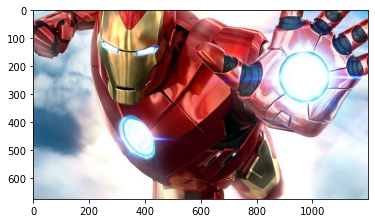

In [14]:
# Chargement et affichage de l'image iron_man.jpg
ironman=io.imread(path_base+'iron_man.jpg')
plt.imshow(ironman)

J'ai un caprice : je n'aime pas le rouge. C'est la seule chose que je déteste dans ce monde : la couleur rouge. J'aimerai que Iron Man ne soit plus rouge mais bleu. Par contre, j'aime le jaune, donc je veux qu'on garde la couleur jaune. Et le bleu, je veux qu'il reste bleu aussi... On garde tout, sauf le rouge, qu'on va mettre en bleu.

Pour résumé : l'objectif de cet exercice va être de sélectionner les pixels rouges de l'image Iron Man et les mettre en bleus, tout en faisant que l'image reste naturelle. Je vous laisse la liberté de faire comme vous le souhaitez, mais je vous recommande fortement de revoir l'exercice 3 si le message passé n'est pas clair...

Pour réaliser cet exercice, on peut le diviser en 2 parties : la sélection des pixels rouges, et ensuite le changement de teinte de ces pixels.

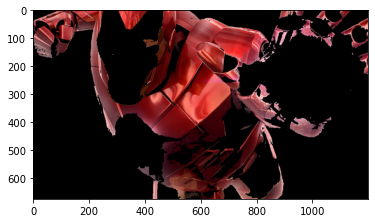

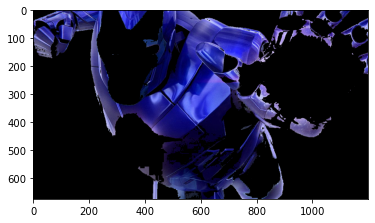

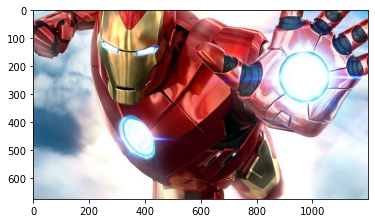

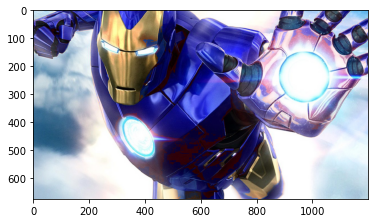

In [15]:
# Première méthode
img_hsv = cv2.cvtColor(ironman, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)
## mask o red
maskr1 = cv2.inRange(img_hsv, (0,50,50), (10, 255, 255))

## mask o red
maskr2 = cv2.inRange(img_hsv, (170,50,50), (180, 255, 255))

## final mask and masked
mask = cv2.bitwise_or(maskr1, maskr2)

target_r = cv2.bitwise_and(ironman,ironman, mask=mask)


r=target_r[:,:,2]
g=target_r[:,:,1]
b=target_r[:,:,0]


target_b=np.stack([r,g,b],axis=-1)

plt.figure(3)
plt.imshow(target_r)
plt.figure(1)
plt.imshow(target_b)
plt.figure(2)
plt.imshow(ironman)
plt.figure(4)
plt.imshow(target_b+ironman-target_r)

In [17]:
# deuxième méthode
img_hsv = cv2.cvtColor(ironman, cv2.COLOR_RGB2HSV)
img_hsv_c=img_hsv.copy()
for i in range(img_hsv_c.shape[0]):
    for j in range(img_hsv_c.shape[1]):
        if (img_hsv_c[i,j,0]>=0 and img_hsv_c[i,j,0]<=10) or (img_hsv_c[i,j,0]>=170 and img_hsv_c[i,j,0]<=180):
            img_hsv_c[i,j,0]=(img_hsv_c[i,j,0]+120)%180

In [18]:
img_rgb = cv2.cvtColor(img_hsv_c, cv2.COLOR_HSV2RGB)

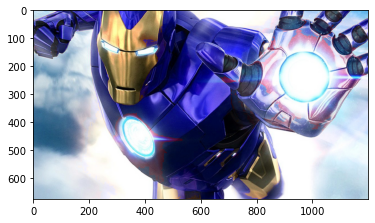

In [19]:
plt.imshow(img_rgb)

## Rendu de TP
Le rendu qui vous est demandé pour les TP de TIM est la version HTML de ce notebook. Pour l'obtenir: Fichier, télécharger au format, HTML (.html).